# Dependencies


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
df = pd.read_csv("/Users/sm/Developer/Projects/Danish Residential Housing EDA/DKHousingPricesSample100k.csv")

In [5]:
df.head()

,date,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%
0,2024-10-24,2024Q4,16,Villa,regular_sale,1997,6500000,-3.0,5,142.0,45774.650,Spættevej 16,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
1,2024-10-24,2024Q4,13,Apartment,regular_sale,1885,3400000,0.0,2,46.0,73913.050,"Jakob Dannefærds Vej 10B, 4. th",1973,Frederiksberg C,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
2,2024-10-23,2024Q4,60,Villa,regular_sale,1949,4550000,-4.0,4,112.0,40625.000,Vestre Plantagevej 3,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
3,2024-10-23,2024Q4,29,Villa,regular_sale,2001,1630000,-12.0,4,186.0,8763.440,Toftebjerg 3,4400,Kalundborg,Other islands,Zealand,3.1,NaN,NaN
4,2024-10-22,2024Q4,92,Apartment,regular_sale,1965,1975000,-10.0,3,82.0,24085.365,"Ryttergårdsvej 20, 1. 113",3520,Farum,North Zealand,Zealand,3.1,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   date                                 100000 non-null  object 
 1   quarter                              100000 non-null  object 
 2   house_id                             100000 non-null  int64  
 3   house_type                           100000 non-null  object 
 4   sales_type                           100000 non-null  object 
 5   year_build                           100000 non-null  int64  
 6   purchase_price                       100000 non-null  int64  
 7   %_change_between_offer_and_purchase  100000 non-null  float64
 8   no_rooms                             100000 non-null  int64  
 9   sqm                                  100000 non-null  float64
 10  sqm_price                            100000 non-null  float64
 11  address       

## Missing Values

In [7]:
df.isna().sum()

date                                    0
quarter                                 0
house_id                                0
house_type                              0
sales_type                              0
year_build                              0
purchase_price                          0
%_change_between_offer_and_purchase     0
no_rooms                                0
sqm                                     0
sqm_price                               0
address                                 0
zip_code                                0
city                                   11
area                                    0
region                                  0
nom_interest_rate%                      0
dk_ann_infl_rate%                      77
yield_on_mortgage_credit_bonds%        77
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

date                                   0
quarter                                0
house_id                               0
house_type                             0
sales_type                             0
year_build                             0
purchase_price                         0
%_change_between_offer_and_purchase    0
no_rooms                               0
sqm                                    0
sqm_price                              0
address                                0
zip_code                               0
city                                   0
area                                   0
region                                 0
nom_interest_rate%                     0
dk_ann_infl_rate%                      0
yield_on_mortgage_credit_bonds%        0
dtype: int64

In [10]:
df.shape

(99912, 19)

# Exploratory Data Analysis 

#### DISTRIBUTION OF PURCHASE PRICE

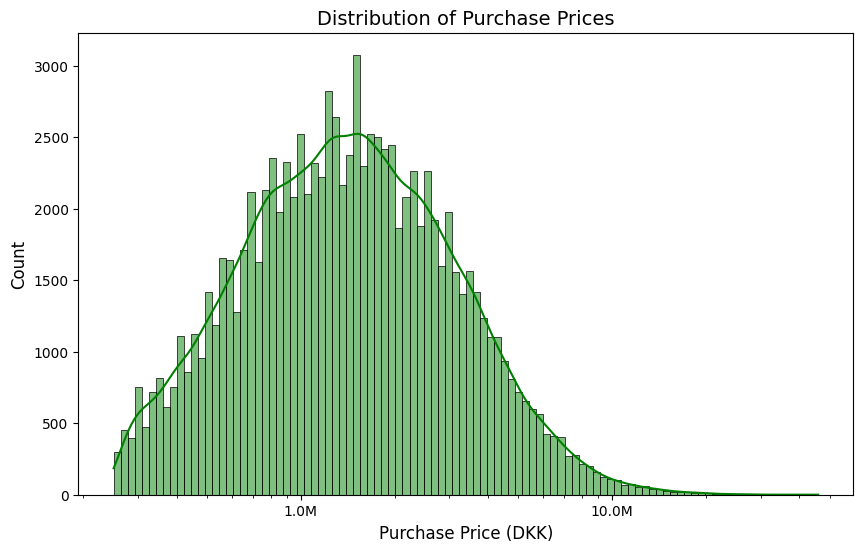

In [52]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
ax = sns.histplot(df['purchase_price'], bins=100, kde=True, color='green', log_scale=True)

# Format the x-axis to show millions with an 'M' suffix
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

plt.title('Distribution of Purchase Prices', fontsize=14)
plt.xlabel('Purchase Price (DKK)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#### DISTRIBUTION OF HOUSE TYPE BY PRICE

/var/folders/7f/xrny7_8d32q6xy6nps28xn8m0000gn/T/ipykernel_74065/816393199.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='house_type', order=house_order, color='green', palette="Greens_r")


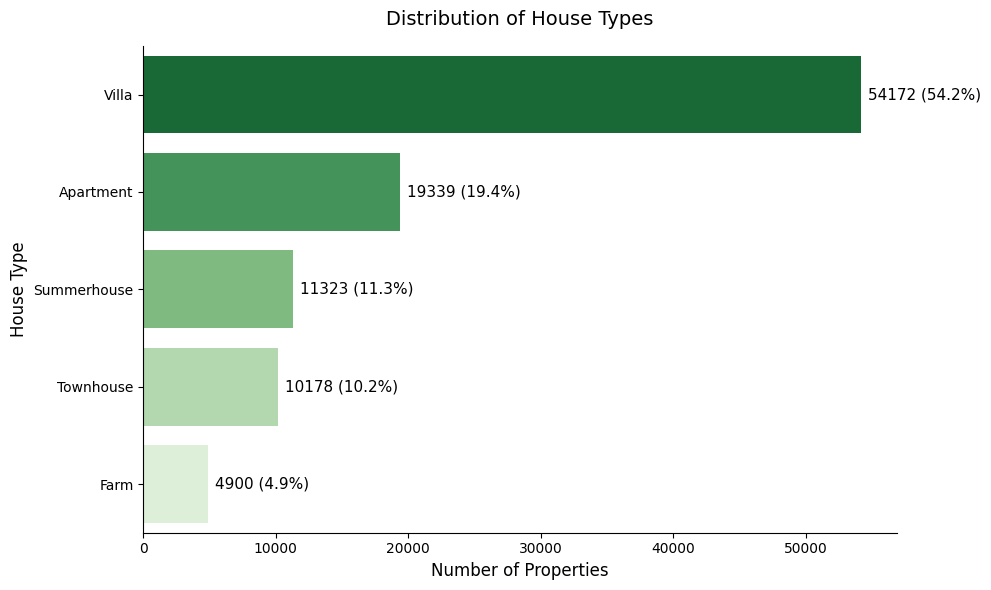

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

house_order = df['house_type'].value_counts().index

ax = sns.countplot(data=df, y='house_type', order=house_order, color='green', palette="Greens_r")

# 3. Add counts and percentages as text on the bars
total = len(df)

for p in ax.patches:
    width = p.get_width()
    percentage = f'{100 * width / total:.1f}%'
    ax.annotate(f'{int(width)} ({percentage})', 
                (width, p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', 
                ha='left', va='center', fontsize=11)

plt.title('Distribution of House Types', fontsize=14, pad=15)
plt.xlabel('Number of Properties', fontsize=12)
plt.ylabel('House Type', fontsize=12)

# 4. Clean up the styling
sns.despine() # Removes the box outline
plt.tight_layout()
plt.show()

# AVERAGE PURCHASE PRICE BY REGION

/var/folders/7f/xrny7_8d32q6xy6nps28xn8m0000gn/T/ipykernel_74065/2739372708.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


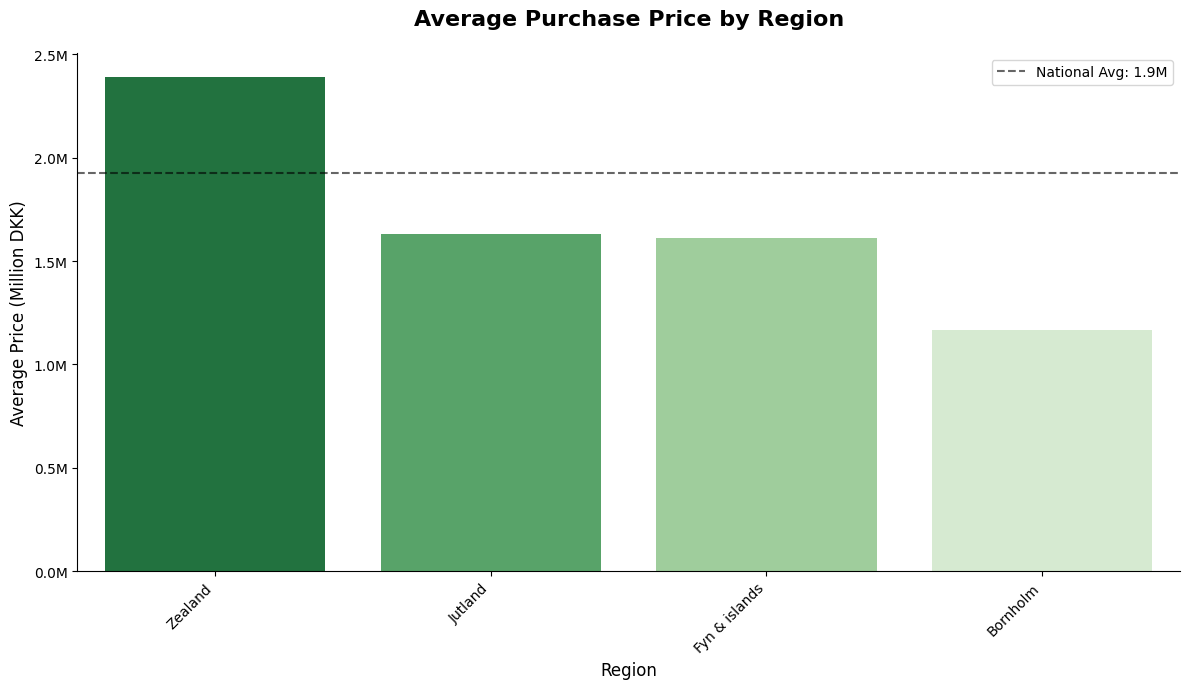

In [56]:
region_order = df.groupby('region')['purchase_price'].mean().sort_values(ascending=False).index

plt.figure(figsize=(12, 7))

ax = sns.barplot(
    data=df, 
    x='region', 
    y='purchase_price', 
    order=region_order,
    palette='Greens_r', 
    errorbar=None
)

# Format Y-axis to Millions for better readability
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Add the average price as a horizontal line for context
overall_avg = df['purchase_price'].mean()

plt.axhline(overall_avg, color='black', linestyle='--', alpha=0.6, label=f'National Avg: {overall_avg/1e6:.1f}M')

plt.title('Average Purchase Price by Region', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Price (Million DKK)', fontsize=12)
plt.xticks(rotation=45, ha='right') # 'ha' aligns the labels better when rotated
plt.legend()

sns.despine()
plt.tight_layout()
plt.show()

# DISTRIBUTION OF SQM AND PURCHASE PRICE

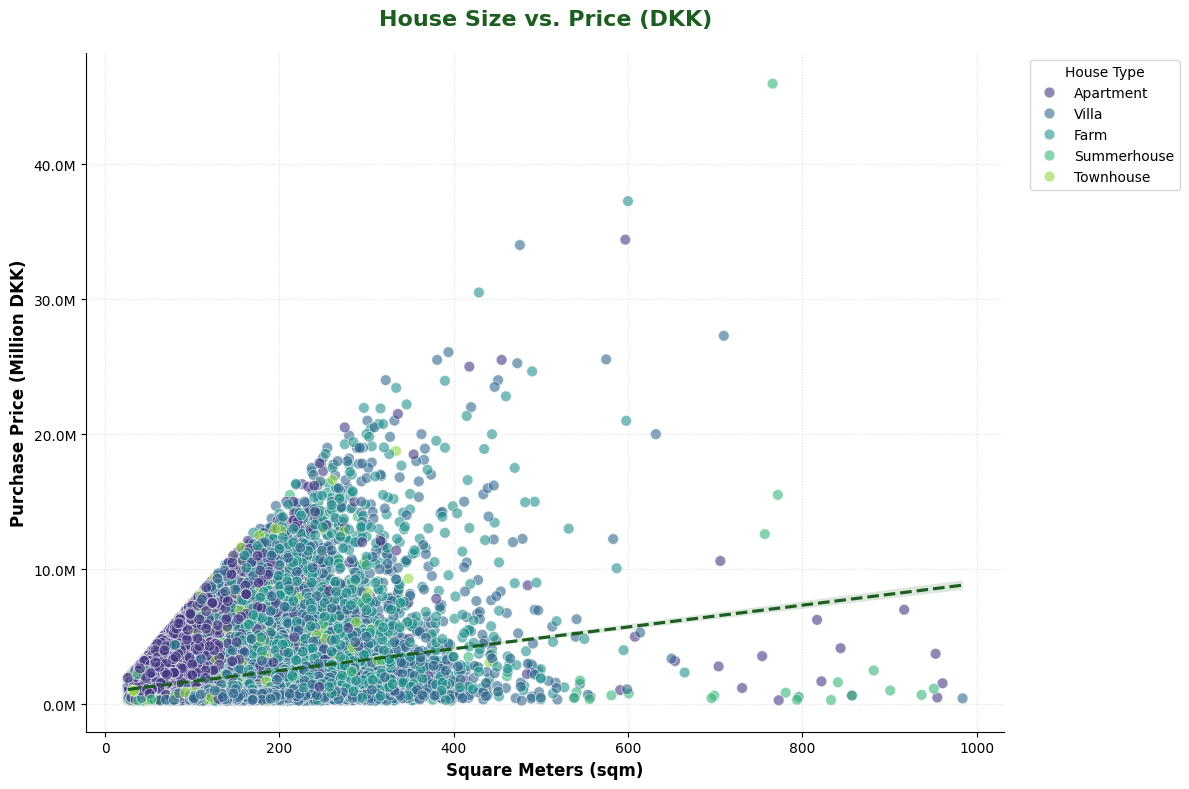

In [58]:
plt.figure(figsize=(12, 8))

ax = sns.scatterplot(
    data=df, 
    x='sqm', 
    y='purchase_price', 
    hue='house_type', 
    palette='viridis', 
    alpha=0.6,         
    edgecolor='w',     
    s=60               
)

# Fix the Price Axis (Million DKK)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

sns.regplot(
    data=df, x='sqm', y='purchase_price', 
    scatter=False, color='#1b5e20', line_kws={'linestyle':'--'}
)

# Styling & Theme
plt.title('House Size vs. Price (DKK)', fontsize=16, fontweight='bold', pad=20, color='#1b5e20')
plt.xlabel('Square Meters (sqm)', fontsize=12, fontweight='semibold')
plt.ylabel('Purchase Price (Million DKK)', fontsize=12, fontweight='semibold')

# Move legend to a place where it doesn't block data
plt.legend(title='House Type', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=True)

sns.despine()
plt.grid(True, linestyle=':', alpha=0.4)
plt.tight_layout()
plt.show()

# DISTRIBUTION OF SQM PRICE BY HOUSE TYPE

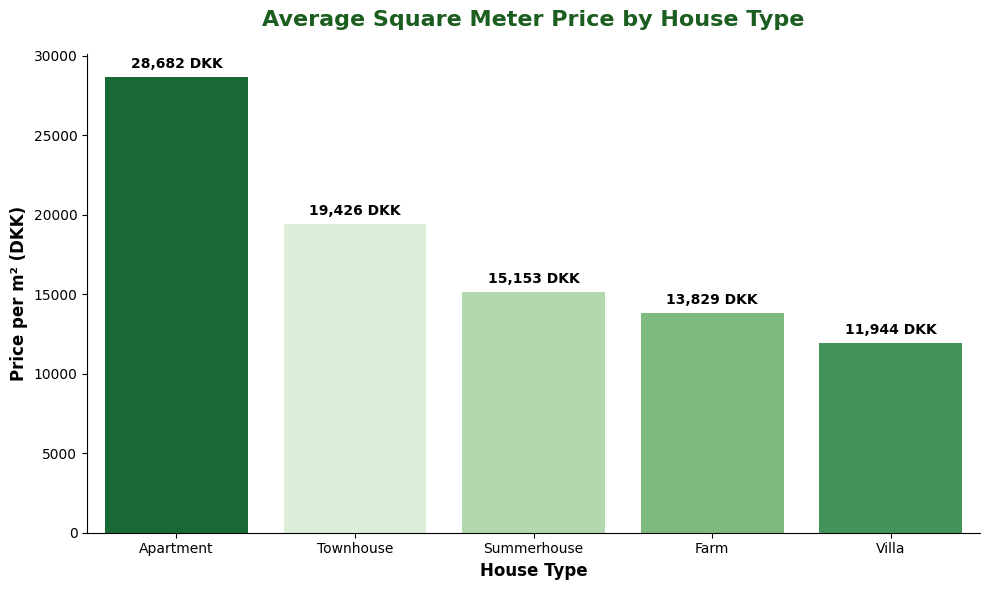

In [66]:
sqm_order = df.groupby('house_type')['sqm_price'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=df, 
    x='house_type', 
    y='sqm_price', 
    order=sqm_order, 
    palette='Greens_r', 
    hue='house_type',
    legend=False,
    errorbar=None
)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,} DKK', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=10,
                fontweight='bold')

plt.title('Average Square Meter Price by House Type', fontsize=16, fontweight='bold', pad=20, color='#1b5e20')
plt.xlabel('House Type', fontsize=12, fontweight='semibold')
plt.ylabel('Price per m² (DKK)', fontsize=12, fontweight='semibold')

sns.despine()
plt.tight_layout()
plt.show()

# DISTRIBUTION OF PURCHASE PRICE BY SALES TYP

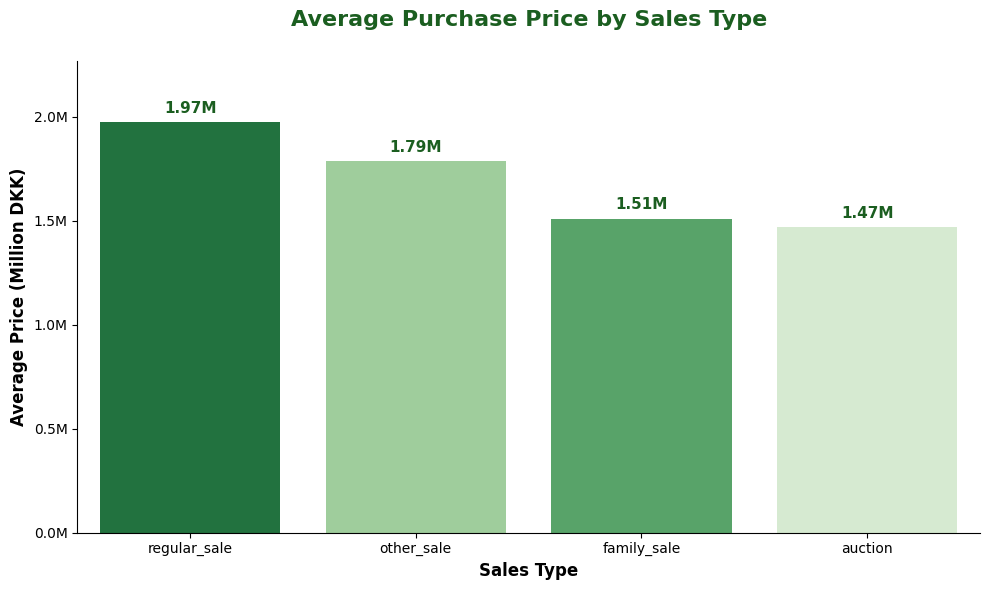

In [69]:
sales_order = df.groupby('sales_type')['purchase_price'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))

# 2. Use your Greens_r theme
ax = sns.barplot(
    data=df, 
    x='sales_type', 
    y='purchase_price', 
    order=sales_order,
    palette='Greens_r', 
    hue='sales_type',
    legend=False,
    errorbar=None
)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/1e6:.2f}M', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=11, fontweight='bold', color='#1b5e20')

plt.title('Average Purchase Price by Sales Type', fontsize=16, fontweight='bold', pad=25, color='#1b5e20')
plt.xlabel('Sales Type', fontsize=12, fontweight='semibold')
plt.ylabel('Average Price (Million DKK)', fontsize=12, fontweight='semibold')

plt.ylim(0, df.groupby('sales_type')['purchase_price'].mean().max() * 1.15)

sns.despine()
plt.tight_layout()
plt.show()

# DISTRIBUTION FOR NUMBER OF ROOMS


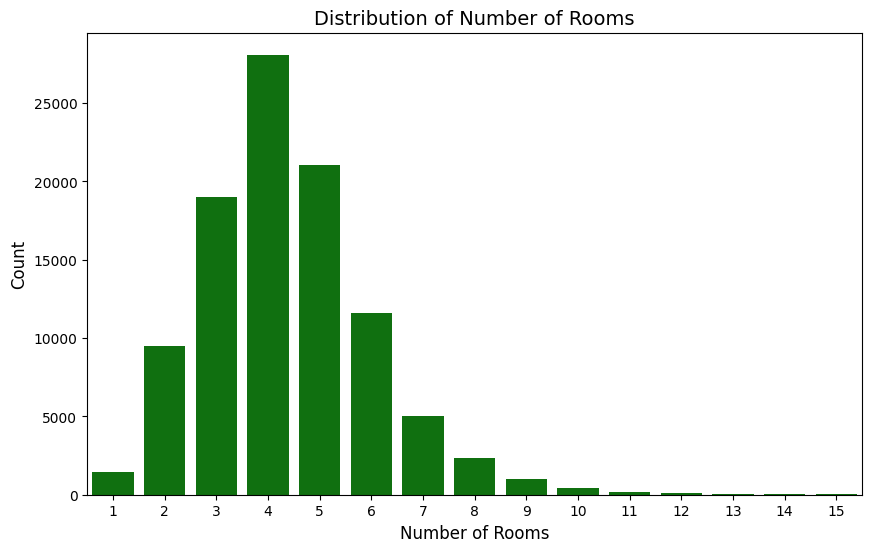

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='no_rooms', color='green')
plt.title('Distribution of Number of Rooms', fontsize=14)
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# VIOLIN PLOT

- Thick part: Where most houses are priced.

- Thin part: Where very few houses exist.

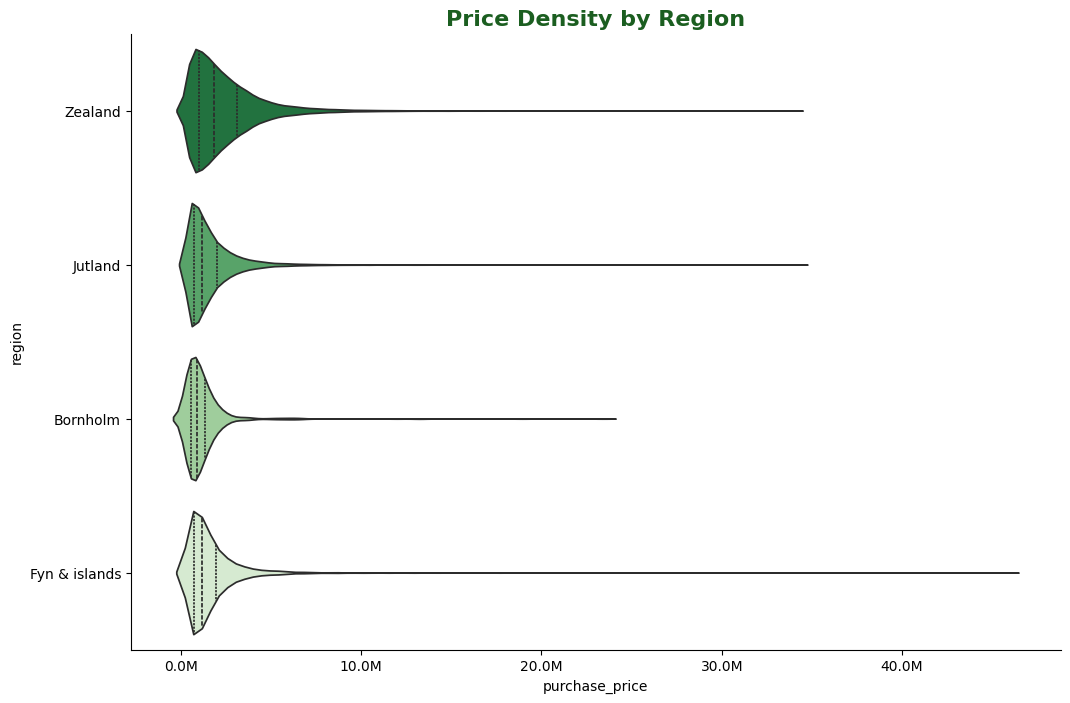

In [76]:
plt.figure(figsize=(12, 8))

# Violin plots are like boxplots but "smoother"
ax = sns.violinplot(
    data=df, 
    y='region', 
    x='purchase_price', 
    palette='Greens_r',
    inner='quartile', # Shows the internal 25/50/75 percent lines
    hue='region',
    legend=False
)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
plt.title('Price Density by Region', fontsize=16, fontweight='bold', color='#1b5e20')
sns.despine()
plt.show()

# HEATMAP OF CORRELATIONS

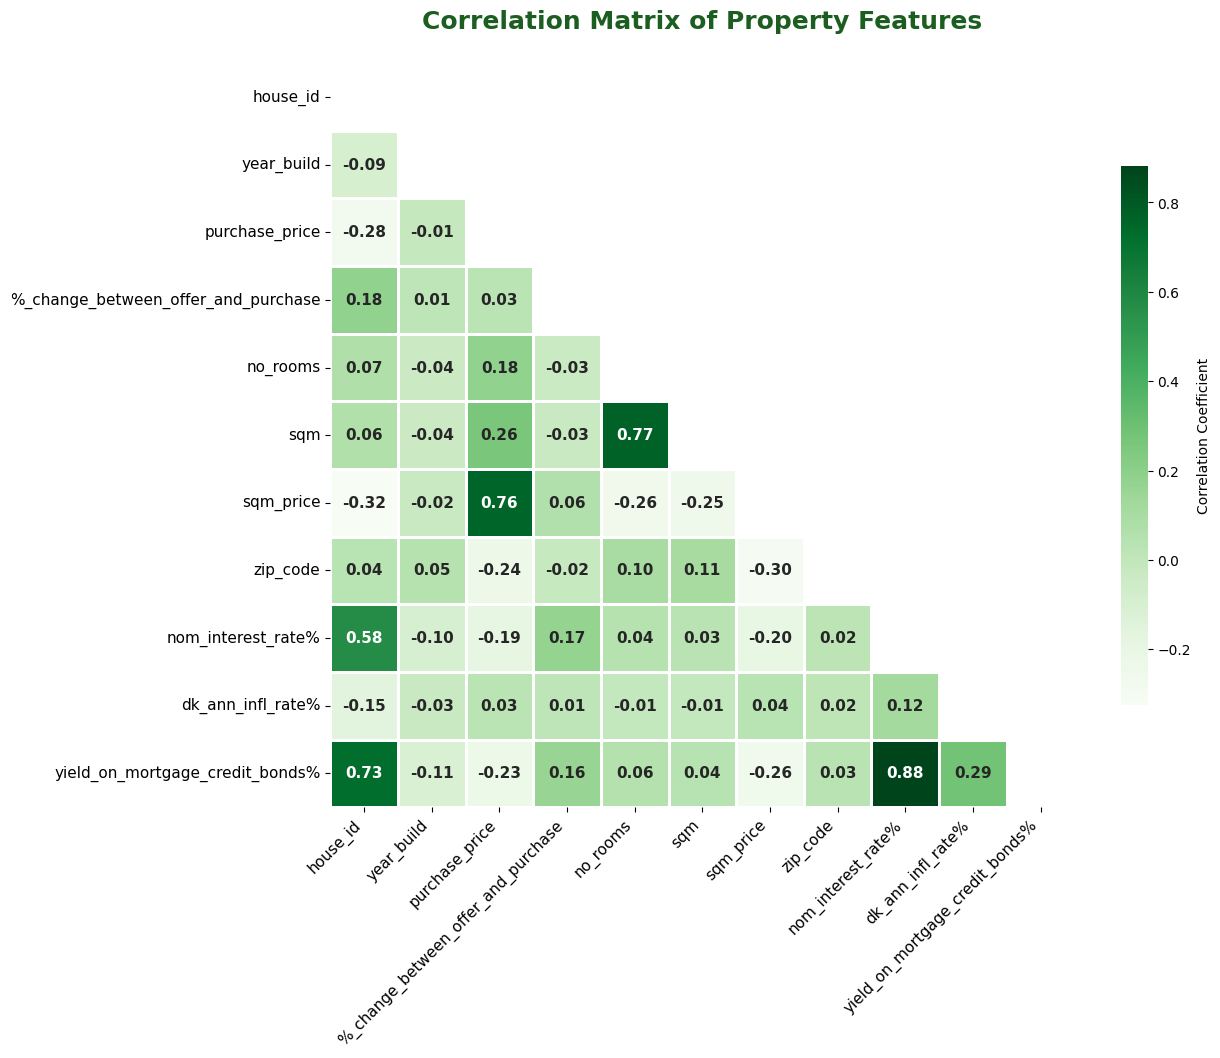

In [80]:
# 1. Prepare data
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

# 2. Create a "Mask" to hide the upper triangle
# This makes it much easier to read because it removes the mirrored values
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))

# 3. Use the 'Greens' palette
# 'annot_kws' makes the numbers bold and easy to see
ax = sns.heatmap(
    corr, 
    mask=mask, 
    annot=True, 
    cmap='Greens', 
    fmt='.2f', 
    linewidths=1, 
    square=True, 
    cbar_kws={'shrink': 0.7, 'label': 'Correlation Coefficient'},
    annot_kws={"size": 11, "weight": "bold"}
)

# 4. Styling
plt.title('Correlation Matrix of Property Features', fontsize=18, fontweight='bold', pad=25, color='#1b5e20')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

plt.show()